<a href="https://colab.research.google.com/github/Avishek-058/CSE_THESIS-CUET/blob/main/DeBERTa_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Text Cleaning***

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.9 MB/s eta 0:00:00


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import contractions
from spellchecker import SpellChecker  # For spell checking
import emoji  # For handling emojis

# Initialize spell checker
spell = SpellChecker()

# Function to clean text while preserving original meaning
def advanced_clean_text(text):
    if not isinstance(text, str):
        return text  # Return as-is if it's not a string (e.g., NaN)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "aren't" → "are not", "they're" → "they are")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Fix common abbreviations (e.g., "U.S.A." → "USA", "I.B.M." → "IBM")
    text = re.sub(r'\b([A-Z]\.)+[A-Z]\.?\b', lambda x: x.group().replace('.', ''), text)

    # Handle emojis (convert them to text descriptions)
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove special characters (except hyphens and apostrophes)
    text = re.sub(r'[^a-zA-Z0-9\s\'-]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Preserve hyphenated words (e.g., "state-of-the-art")
    text = re.sub(r'(\b\w+)-(\w+\b)', r'\1-\2', text)

    # Preserve decimal numbers (e.g., 3.14 should stay as 3.14)
    text = re.sub(r'(\d+)\.(\d+)', r'\1DOTPLACEHOLDER\2', text)

    # Remove standalone apostrophes (e.g., "rock 'n' roll" → "rock n roll")
    text = re.sub(r"(?<!\w)'|'(?!\w)", "", text)

    # Restore decimal points
    text = text.replace('DOTPLACEHOLDER', '.')

    # Spell check and correct misspelled words
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    text = ' '.join(corrected_words)

    return text

# Example usage
sample_text = "Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt."
cleaned_text = advanced_clean_text(sample_text)
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)


Original Text: Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt.
Cleaned Text: hey check this out smiling face with smiling eyes i am loving it you s a is awesome state-of-the-art teach do not forget to visit 3 14 is pi this is a test


In [ ]:
# Apply to DataFrame
df = pd.read_csv('/content/sample_data/final_dataset.csv')  # Load your dataset
df['Cleaned_Review'] = df['Review_Content'].fillna('').apply(advanced_clean_text)

# Save cleaned data
df.to_csv('/content/cleaned_reviews.csv', index=False)
print("✅ Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!")

✅ Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!


In [ ]:
df.head(5)

,Category,Rating,Label,Review_Content,Cleaned_Review
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,every batch has been great it even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",this scarf was so cute in person so happy i bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,i received this arc from the publisher via leg...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",awesome kit simple yet fun at the same time ab...


# ***Text Lowering***

In [ ]:
df['Review_Content_lower']= df['Cleaned_Review'].apply(lambda x: x.lower())

In [ ]:
df.to_csv('/content/lower_reviews.csv', index=False)

# ***Lemmatizing***

In [ ]:
!rm -rf /root/nltk_data
!mkdir -p /root/nltk_data
!python -m nltk.downloader -d /root/nltk_data all


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [ ]:
import nltk
nltk.data.path.append("/root/nltk_data")

# ✅ Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("NLTK setup complete!")


NLTK setup complete!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from gensim.utils import tokenize

# ✅ Download required resources
import nltk

# ✅ Download the correct resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # ✅ Corrected this!


# ✅ Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# ✅ Function to get correct POS tags for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

# ✅ Function to apply tokenization + lemmatization
def lemmatize_text(text):
    tokens = list(tokenize(str(text)))  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

# ✅ Read dataset
df = pd.read_csv("/content/lower_reviews.csv")  # Change to your actual file

# ✅ Apply lemmatization
df['Lemmatized_Review'] = df['Review_Content_lower'].apply(lemmatize_text)

# ✅ Save to new CSV file
df.to_csv("lemmatized_dataset.csv", index=False)

print("✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!


In [ ]:
# Select only the 'Review_Content_stemmatize_&_lemmatize' and 'Label' columns
df_subset = df[['Lemmatized_Review', 'Label','Rating']]#'Category','Rating']]

# Save the subset DataFrame to a new CSV file
df_subset.to_csv('/content/avishek.csv', index=False)

# Preview the new CSV file
df_subset.head(5)


,Lemmatized_Review,Label,Rating
0,good idea but give star because it do not work...,0,3.0
1,every batch have be great it even smell awesome,1,5.0
2,this scarf be so cute in person so happy i bou...,1,5.0
3,i receive this arc from the publisher via lega...,1,4.0
4,awesome kit simple yet fun at the same time ab...,1,5.0


In [ ]:
# Rename the column 'Review_Content_stemmatize_&_lemmatize' to a new name
df = df.rename(columns={'Lemmatized_Review': 'Processed_Review'})

# Now, select only the 'New_Column_Name' and 'Label' columns
df_subset = df[['Processed_Review', 'Label','Rating']]#'Category']]

# Save the new DataFrame with the renamed column to a new CSV file
df_subset.to_csv('/content/avishek_preprocessed_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(20)

,Processed_Review,Label,Rating
0,good idea but give star because it do not work...,0,3.0
1,every batch have be great it even smell awesome,1,5.0
2,this scarf be so cute in person so happy i bou...,1,5.0
3,i receive this arc from the publisher via lega...,1,4.0
4,awesome kit simple yet fun at the same time ab...,1,5.0
5,great in every way except that it do not feel ...,0,4.0
6,oh my gosh i think this be the best one of all...,1,5.0
7,bought this a remote for my wife and she love ...,0,5.0
8,i cannot live without my daughter love this ve...,0,5.0
9,i be give a free copy of this book in exchange...,1,2.0


# ***DeBERTa large/base***

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import DebertaV2Tokenizer, DebertaV2Model
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset

# ✅ Load Pre-trained DeBERTa Model & Tokenizer
deberta_model_name = "microsoft/deberta-v3-base"
tokenizer = DebertaV2Tokenizer.from_pretrained(deberta_model_name)
deberta_model = DebertaV2Model.from_pretrained(deberta_model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
deberta_model.to(device)
deberta_model.eval()

# ✅ Load Dataset
df = pd.read_csv("/content/sample_data/avishek_preprocessed_dataset.csv")

# ✅ Define PyTorch Dataset Class
class ReviewDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts.fillna("empty")  # Handle missing values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts.iloc[idx]

# ✅ Create Dataset & DataLoader
batch_size = 16  # Reduce if memory issues
dataset = ReviewDataset(df["Processed_Review"])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# ✅ Function to Extract DeBERTa Embeddings
def get_deberta_embeddings(batch_texts):
    batch_texts = list(batch_texts)

    # Tokenization
    encoded_inputs = tokenizer(
        batch_texts,
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = deberta_model(**encoded_inputs)

    # ✅ Use CLS Token Embedding for Sentence Representation
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# ✅ Extract DeBERTa Embeddings in Batches
all_embeddings = []
for batch in tqdm(dataloader, desc="Extracting DeBERTa Embeddings"):
    embeddings = get_deberta_embeddings(batch)
    all_embeddings.append(embeddings)

# ✅ Convert to DataFrame
embedding_df = pd.DataFrame(np.vstack(all_embeddings), columns=[f"dim_{i}" for i in range(768)])

# ✅ Merge with Original Data
df_deberta = pd.concat([df, embedding_df], axis=1)

# ✅ Save the DeBERTa Embeddings File
df_deberta.to_csv("deberta_embeddings.csv", index=False)
print("✅ DeBERTa embeddings saved successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]


Extracting DeBERTa Embeddings: 100%|██████████| 625/625 [3:14:55<00:00, 18.71s/it]


✅ DeBERTa embeddings saved successfully!


# ***Sentiment Analysis***

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# ✅ Download VADER Lexicon (Only Needed Once)
nltk.download("vader_lexicon")

# ✅ Load Dataset with DistilBERT Embeddings
df = pd.read_csv("/content/deberta_embeddings.csv")

# ✅ Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ✅ Compute Sentiment Scores
df["final_sentiment_score"] = df["Processed_Review"].fillna("").apply(lambda text: sia.polarity_scores(text)["compound"])

# ✅ Save Updated Dataset
df.to_csv("deberta_sentiment.csv", index=False)
print("✅ Sentiment scores added and saved successfully!")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


✅ Sentiment scores added and saved successfully!


# ***Pos Tagging***

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# ✅ Load spaCy Model for POS Tagging
nlp = spacy.load("en_core_web_sm")

# ✅ Load Dataset with DistilBERT Embeddings + Sentiment Scores
df = pd.read_csv("/content/deberta_sentiment.csv")

# ✅ Function to Compute POS Tag Ratios
def get_pos_ratios_spacy(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos_tag = token.pos_
        pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    total_words = len(doc)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()} if total_words > 0 else {}
    return pos_ratios

# ✅ Apply POS Tagging to Each Review
pos_features = df["Processed_Review"].fillna("").apply(get_pos_ratios_spacy)

# ✅ Convert POS Features to DataFrame
pos_features_df = pos_features.apply(pd.Series).fillna(0)

# ✅ Merge POS Features with Original Data
df_with_pos = pd.concat([df, pos_features_df], axis=1)

# ✅ Save Final Dataset with POS Features
df_with_pos.to_csv("deberta_sentiment_pos.csv", index=False)
print("✅ POS features added and saved successfully!")

✅ POS features added and saved successfully!


# ***TF-IDF Scores***

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Load Dataset with DistilBERT Embeddings, Sentiment, and POS Features
df = pd.read_csv("/content/deberta_sentiment_pos.csv")

# ✅ Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Top 5000 important words

# ✅ Compute TF-IDF Matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Processed_Review"].fillna(""))

# ✅ Get TF-IDF Word Scores
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(tfidf_vocab, np.asarray(tfidf_matrix.mean(axis=0)).flatten()))

# ✅ Save TF-IDF Scores as DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vocab)

# ✅ Merge with Original Data
df_final = pd.concat([df, tfidf_df], axis=1)

# ✅ Save Final Dataset with TF-IDF
df_final.to_csv("deberta_sentiment_pos_tfidf.csv", index=False)
print("✅ TF-IDF scores added and saved successfully!")

✅ TF-IDF scores added and saved successfully!


# ***splitting dataset***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = "/content/deberta_sentiment_pos_tfidf.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 1: First split - 70% Train, 30% Temp (Test + Validation)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["Label"], random_state=42)

# Step 2: Second split - 15% Test, 15% Validation (from Temp)
test_df, val_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["Label"], random_state=42)

# Check the distribution
print("Train Set:\n", train_df["Label"].value_counts())
print("Test Set:\n", test_df["Label"].value_counts())
print("Validation Set:\n", val_df["Label"].value_counts())

# Save the datasets
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("validation_data.csv", index=False)

print("Splitting completed successfully!")


Train Set:
 Label
1    3500
0    3500
Name: count, dtype: int64
Test Set:
 Label
1    750
0    750
Name: count, dtype: int64
Validation Set:
 Label
0    750
1    750
Name: count, dtype: int64
Splitting completed successfully!


# ***CNN+LSTM***

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate, BatchNormalization
)
from sklearn.preprocessing import StandardScaler

# ✅ Load Data
train_df = pd.read_csv("/content/sample_data/train_data.csv")
test_df = pd.read_csv("/content/sample_data/test_data.csv")
val_df = pd.read_csv("/content/sample_data/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # DeBERTa Embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS Tags
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF

# ✅ Extract DeBERTa Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Scale POS and TF-IDF Features
scaler = StandardScaler()
X_train_pos = scaler.fit_transform(X_train_pos)
X_test_pos = scaler.transform(X_test_pos)
X_val_pos = scaler.transform(X_val_pos)

X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
X_val_tfidf = scaler.transform(X_val_tfidf)

# ✅ Labels (Binary Classification)
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on DeBERTa
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on DeBERTa Embeddings
cnn = Conv1D(filters=256, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn = BatchNormalization()(cnn)  # 🔥 Add Batch Norm
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)

# ✅ LSTM on DeBERTa Embeddings (Reduced to prevent overfitting)
lstm_layer = LSTM(64, return_sequences=False)(embedding_input)

# ✅ Merge CNN, LSTM, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([cnn, lstm_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(256, activation='relu')(merged)
fc = Dropout(0.5)(fc)  # 🔥 Increased Dropout
fc = Dense(128, activation='relu')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("improved_cnn_lstm_deberta_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 24, 256)        │          1,024 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 12, 256)        │              0 │ batch_normalization_4… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 3072)           │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 64)             │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 8155)           │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ lstm_4[0][0],          │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 256)            │      2,087,936 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 256)            │              0 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 128)            │         32,896 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 128)            │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │            129 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,188,033 (8.35 MB)

 Trainable params: 2,187,521 (8.34 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.5370 - loss: 1.0838 - val_accuracy: 0.8207 - val_loss: 0.5076
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7243 - loss: 0.5213 - val_accuracy: 0.8673 - val_loss: 0.4635
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.7803 - loss: 0.4721 - val_accuracy: 0.8633 - val_loss: 0.3797
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8429 - loss: 0.3589 - val_accuracy: 0.8793 - val_loss: 0.2815
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.8688 - loss: 0.3033 - val_accuracy: 0.8907 - val_loss: 0.2765
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8923 - loss: 0.2705 - val_accuracy: 0.8907 - val_loss: 0.2749
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8931 - loss: 0.2525 - val_accuracy: 0.8933 - val_loss: 0.2748
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9031 - loss: 0.2341 - 

Test Accuracy: 89.7333%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Accuracy: 0.8973
Precision: 0.9269
Recall: 0.8627
F1 Score: 0.8936

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       750
           1       0.93      0.86      0.89       750

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



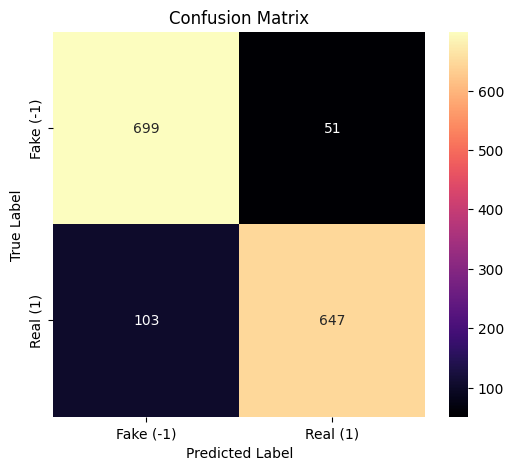

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# ***CNN+Bi-LSTM***

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Concatenate, BatchNormalization
)
from sklearn.preprocessing import StandardScaler

# ✅ Load Data
train_df = pd.read_csv("/content/sample_data/train_data.csv")
test_df = pd.read_csv("/content/sample_data/test_data.csv")
val_df = pd.read_csv("/content/sample_data/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # DeBERTa Embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS Tags
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF

# ✅ Extract DeBERTa Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Scale POS and TF-IDF Features
scaler = StandardScaler()
X_train_pos = scaler.fit_transform(X_train_pos)
X_test_pos = scaler.transform(X_test_pos)
X_val_pos = scaler.transform(X_val_pos)

X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
X_val_tfidf = scaler.transform(X_val_tfidf)

# ✅ Labels (Binary Classification)
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on DeBERTa
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on DeBERTa Embeddings
cnn = Conv1D(filters=256, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn = BatchNormalization()(cnn)  # 🔥 Add Batch Norm
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)

# ✅ BiLSTM on DeBERTa Embeddings
bilstm_layer = Bidirectional(LSTM(64, return_sequences=False))(embedding_input)

# ✅ Merge CNN, BiLSTM, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([cnn, bilstm_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(256, activation='relu')(merged)
fc = Dropout(0.5)(fc)  # 🔥 Increased Dropout
fc = Dense(128, activation='relu')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_bilstm_deberta_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 24, 256)        │          1,024 │ conv1d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 12, 256)        │              0 │ batch_normalization_5… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 3072)           │              0 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 128)            │         49,664 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 8219)           │              0 │ flatten_5[0][0],       │
│ (Concatenate)             │                        │                │ bidirectional[0][0],   │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 256)            │      2,104,320 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 256)            │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 128)            │         32,896 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 128)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 1)              │            129 │ dropout_11[0][0]       │
└──────────────────────

 Total params: 2,229,249 (8.50 MB)

 Trainable params: 2,228,737 (8.50 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.5324 - loss: 1.1455 - val_accuracy: 0.7540 - val_loss: 0.6331
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.6630 - loss: 0.6047 - val_accuracy: 0.5147 - val_loss: 0.6265
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6889 - loss: 0.5617 - val_accuracy: 0.4993 - val_loss: 0.6803
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.7037 - loss: 0.5502 - val_accuracy: 0.8673 - val_loss: 0.4514
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7606 - loss: 0.4845 - val_accuracy: 0.8633 - val_loss: 0.4010
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.7930 - loss: 0.4464 - val_accuracy: 0.8673 - val_loss: 0.3870
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.8023 - loss: 0.4359 - val_accuracy: 0.8780 - val_loss: 0.3762
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8326 - loss: 0.3886 - 

Test Accuracy: 89.1333%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step
🔹 Accuracy: 89.13%
🔹 Precision: 0.9116
🔹 Recall: 0.8667
🔹 F1 Score: 0.8886

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       750
           1       0.91      0.87      0.89       750

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



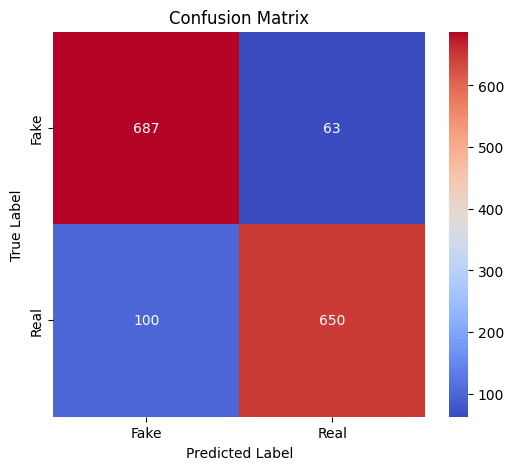

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict Test Data
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# ✅ Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy * 100:.2f}%")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# ✅ Print Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ***CNN+GRU***

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Concatenate, BatchNormalization
)
from sklearn.preprocessing import StandardScaler

# ✅ Load Data
train_df = pd.read_csv("/content/sample_data/train_data.csv")
test_df = pd.read_csv("/content/sample_data/test_data.csv")
val_df = pd.read_csv("/content/sample_data/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # DeBERTa Embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS Tags
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF

# ✅ Extract DeBERTa Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Scale POS and TF-IDF Features
scaler = StandardScaler()
X_train_pos = scaler.fit_transform(X_train_pos)
X_test_pos = scaler.transform(X_test_pos)
X_val_pos = scaler.transform(X_val_pos)

X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
X_val_tfidf = scaler.transform(X_val_tfidf)

# ✅ Labels (Binary Classification)
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on DeBERTa
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on DeBERTa Embeddings
cnn = Conv1D(filters=256, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn = BatchNormalization()(cnn)  # 🔥 Add Batch Norm
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)

# ✅ GRU on DeBERTa Embeddings
gru_layer = GRU(64, return_sequences=False)(embedding_input)

# ✅ Merge CNN, GRU, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([cnn, gru_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(256, activation='relu')(merged)
fc = Dropout(0.5)(fc)  # 🔥 Increased Dropout
fc = Dense(128, activation='relu')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_gru_deberta_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 24, 256)        │          1,024 │ conv1d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 12, 256)        │              0 │ batch_normalization_6… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 3072)           │              0 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 64)             │         18,816 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 8155)           │              0 │ flatten_6[0][0],       │
│ (Concatenate)             │                        │                │ gru[0][0],             │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 256)            │      2,087,936 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 256)            │              0 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 128)            │         32,896 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 128)            │              0 │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 1)              │            129 │ dropout_13[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,182,017 (8.32 MB)

 Trainable params: 2,181,505 (8.32 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - accuracy: 0.5776 - loss: 1.0942 - val_accuracy: 0.8120 - val_loss: 0.4659
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.6999 - loss: 0.5216 - val_accuracy: 0.8453 - val_loss: 0.3702
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.7718 - loss: 0.4358 - val_accuracy: 0.7880 - val_loss: 0.4286
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.7956 - loss: 0.3963 - val_accuracy: 0.8833 - val_loss: 0.2794
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8372 - loss: 0.3433 - val_accuracy: 0.8867 - val_loss: 0.2739
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8450 - loss: 0.3042 - val_accuracy: 0.8867 - val_loss: 0.2785
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8852 - loss: 0.2446 - val_accuracy: 0.8860 - val_loss: 0.2823
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8977 - loss: 0.2202 -

Test Accuracy: 90.0000%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy: 0.9000
Precision: 0.9348
Recall: 0.8600
F1 Score: 0.8958

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       750
           1       0.93      0.86      0.90       750

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



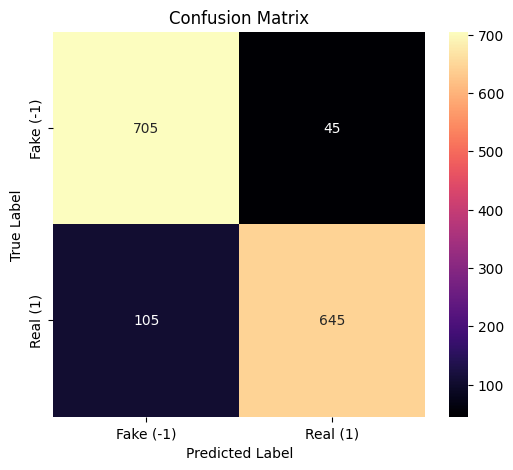

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# ***CNN+Bi-LSTM+GRU***

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout, Flatten, Concatenate, BatchNormalization
)
from sklearn.preprocessing import StandardScaler

# ✅ Load Data
train_df = pd.read_csv("/content/sample_data/train_data.csv")
test_df = pd.read_csv("/content/sample_data/test_data.csv")
val_df = pd.read_csv("/content/sample_data/validation_data.csv")


# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(768)]  # DeBERTa Embeddings
pos_columns = train_df.columns[train_df.columns.str.match(r"^[A-Z]+$")].tolist()  # POS Tags
tfidf_columns = train_df.columns.difference(["Processed_Review", "Label"] + embedding_columns + pos_columns + ["final_sentiment_score"]).tolist()  # TF-IDF

# ✅ Extract DeBERTa Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Scale POS and TF-IDF Features
scaler = StandardScaler()
X_train_pos = scaler.fit_transform(X_train_pos)
X_test_pos = scaler.transform(X_test_pos)
X_val_pos = scaler.transform(X_val_pos)

X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
X_val_tfidf = scaler.transform(X_val_tfidf)

# ✅ Labels (Binary Classification)
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on DeBERTa
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on DeBERTa Embeddings
cnn = Conv1D(filters=256, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn = BatchNormalization()(cnn)  # 🔥 Add Batch Norm
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)

# ✅ BiLSTM on DeBERTa Embeddings
bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_input)

# ✅ GRU on BiLSTM output
gru_layer = GRU(64, return_sequences=False)(bilstm_layer)

# ✅ Merge CNN, BiLSTM + GRU, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([cnn, gru_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(256, activation='relu')(merged)
fc = Dropout(0.5)(fc)  # 🔥 Increased Dropout
fc = Dense(128, activation='relu')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_bilstm_gru_deberta_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 24, 256)        │          1,024 │ conv1d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 12, 256)        │              0 │ batch_normalization_7… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 24, 128)        │         49,664 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 3072)           │              0 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         37,248 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 5001)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 8155)           │              0 │ flatten_7[0][0],       │
│ (Concatenate)             │                        │                │ gru_1[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 256)            │      2,087,936 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 256)            │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 128)            │         32,896 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 128)            │              0 │ dense_22[0][0]         │
├──────────────────────

 Total params: 2,250,113 (8.58 MB)

 Trainable params: 2,249,601 (8.58 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - accuracy: 0.5445 - loss: 1.0808 - val_accuracy: 0.7347 - val_loss: 0.6417
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6527 - loss: 0.6217 - val_accuracy: 0.7760 - val_loss: 0.4753
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 85ms/step - accuracy: 0.7696 - loss: 0.4589 - val_accuracy: 0.8727 - val_loss: 0.3335
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8380 - loss: 0.3712 - val_accuracy: 0.8660 - val_loss: 0.3268
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.8545 - loss: 0.3295 - val_accuracy: 0.8813 - val_loss: 0.2990
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8507 - loss: 0.3257 - val_accuracy: 0.8660 - val_loss: 0.3366
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.8822 - loss: 0.2817 - val_accuracy: 0.8900 - val_loss: 0.2982
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9086 - loss: 0.2359 - 

Test Accuracy: 89.8000%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Accuracy: 0.8980
Precision: 0.9129
Recall: 0.8800
F1 Score: 0.8961

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       750
           1       0.91      0.88      0.90       750

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



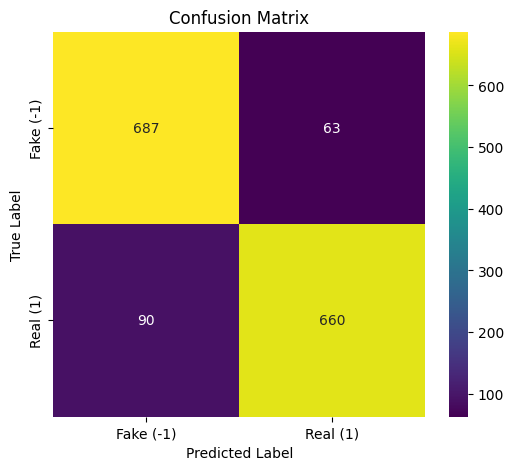

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predict on Test Set
y_pred_prob = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Fake (-1)', 'Real (1)'], yticklabels=['Fake (-1)', 'Real (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
